# PCA as a Regression Approach
PCA, commonly used for dimensionality reduction in classification tasks, is also applicable in regression. Here's how it benefits regression:


1.   Multicollinearity Reduction: PCA identifies and creates uncorrelated principal components, minimizing multicollinearity among independent variables in regression models.
2.   Interpretability Enhancement: It makes regression models more interpretable by simplifying the feature space and revealing underlying patterns.
3. Handling High Dimensionality: PCA simplifies regression models with many features by reducing dimensionality while preserving most of the information.
4. Generalization Improvement: PCA prevents overfitting by focusing on relevant features, enhancing the model's generalization performance.




In [31]:
#Importing necessary modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [32]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[:,:2], y, test_size=0.2, random_state=42)

In [33]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
# Fit a logistic regression model on the original data
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = classifier.predict(X_test_scaled)

In [35]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


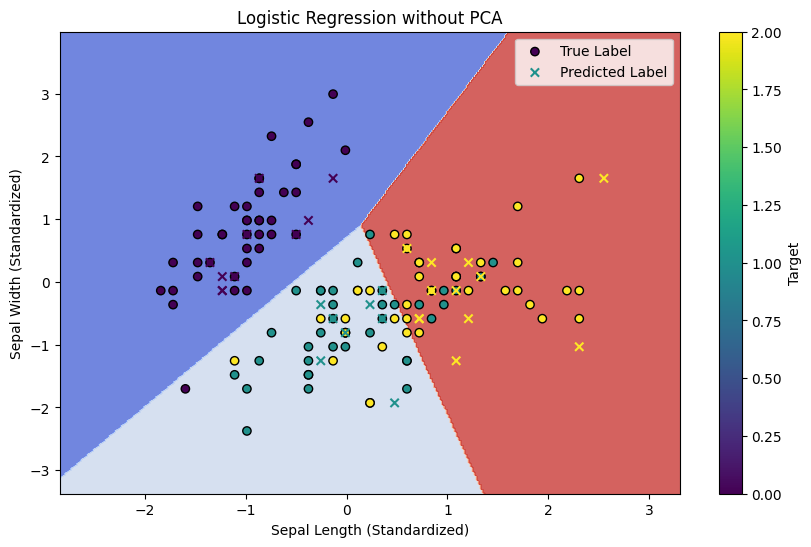

In [36]:
# Plotting decision boundary on original data
plt.figure(figsize=(10, 6))

# Plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Put the result into a color plot
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot training and testing data
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='viridis', edgecolors='k', label='True Label')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, cmap='viridis', marker='x', label='Predicted Label')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.title('Logistic Regression without PCA')
plt.colorbar(label='Target')
plt.legend()
plt.show()

When we plot the dataset, we can see that there is no clear boundary in the plane of the original features. Hence, the logistic regression model will find it difficult to seperate the different classes.

In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
# Perform PCA
pca = PCA(n_components=2)  # Choosing 2 principal components for visualization
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [39]:
# Fit a logistic regression model on the PCA-transformed data
classifier = LogisticRegression()
classifier.fit(X_train_pca, y_train)

# Predict on the testing set
y_pred = classifier.predict(X_train_pca)

In [40]:
# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9166666666666666


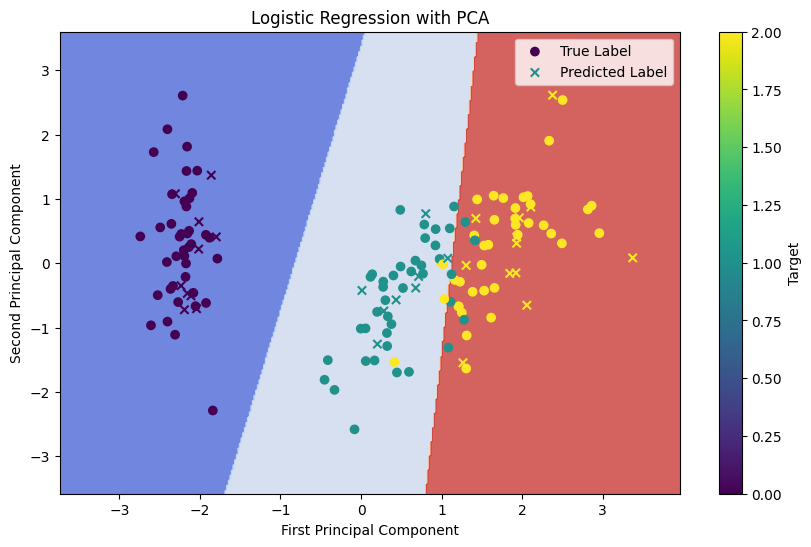

In [41]:
# Plotting decision boundary and PCA components with predicted labels
plt.figure(figsize=(10, 6))

# Plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot training and testing data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', label='True Label')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=classifier.predict(X_test_pca), cmap='viridis', marker='x', label='Predicted Label')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Logistic Regression with PCA')
plt.colorbar(label='Target')
plt.legend()
plt.show()

In the above plot of the principal components of the data, we can see that there are three separable regions occupied by the three differenct classes. By capturing the directions of maximum variance in the data, PCA projects it onto a lower-dimensional subspace, effectively filtering out noise. As a result, we are easily able to find boundaries that separate the classes